# **Project Name**    - Cardiovascular Risk Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mainudin Chhimpa

# **Project Summary -**

Cardiovascular disease is a leading cause of death worldwide, and early prediction of cardiovascular risk can help in timely intervention and prevention of the disease. Machine learning techniques have shown promising results in predicting cardiovascular risk by analyzing various risk factors.

The goal of this project is to develop a machine learning model to predict the 10-year risk of cardiovascular disease in individuals using a dataset of demographic, clinical, and laboratory data.

The dataset used in this project is the Framingham Heart Study dataset, which is a widely used dataset for cardiovascular risk prediction. It contains data on 3,390 participants, who were followed up for ten years to track cardiovascular events. The dataset includes 17 variables such as age, sex, blood pressure, cholesterol levels, smoking status, and diabetes status.

The first step in this project is to perform data preprocessing, which includes handling missing values, encoding categorical variables, and scaling numerical variables. After preprocessing, the dataset is split into training and testing sets using a 80:20 ratio.

Various machine learning algorithms are applied to the training data, including logistic regression, KNN, XGBoost, SVC, and random forest. These algorithms are chosen as they have been shown to perform well in cardiovascular risk prediction. The algorithms are trained on the training data, and their performance is evaluated using the testing data.

The evaluation metrics used in this project include accuracy, precision, recall, and area under the receiver operating characteristic curve (AUC-ROC). These metrics help in assessing the performance of the machine learning model.

The results show that the XGBoost performs the best, with an accuracy of 0.89, precision of 0.91, recall of 0.87, and AUC-ROC of 0.89. This indicates that the model has a good overall performance in predicting cardiovascular risk.

Further analysis is performed to identify the most important features in the dataset. The feature importance plot shows that age, education, prevalentHyp,and cigarettes per day are the top important features in predicting cardiovascular risk. This information can help in identifying high-risk individuals and implementing preventive measures.

In conclusion, this project demonstrates the effectiveness of machine learning techniques in predicting cardiovascular risk using the Framingham Heart Study dataset. The developed machine learning model can be used by healthcare professionals to identify individuals at high risk of cardiovascular disease and take preventive measures to reduce the risk.

### Problem statement
Cardiovascular disease is a major cause of morbidity and mortality worldwide. Early identification and management of individuals at high risk of developing cardiovascular disease is crucial for the prevention of the disease. Traditional risk prediction models, such as the Framingham Risk Score, have limitations in their accuracy and do not account for the complex interactions between various risk factors. Machine learning techniques have shown promising results in improving the accuracy of cardiovascular risk prediction by integrating various risk factors and identifying non-linear interactions. However, there is a need for developing and validating machine learning models that can accurately predict cardiovascular risk using demographic, clinical, and laboratory data. The goal of this project is to address this need by developing and evaluating a machine learning model for predicting the 10-year risk of cardiovascular disease using the Framingham Heart Study dataset.

# ***Let's Begin !***

In [1]:
# import necessary libraries

# Data manipulation libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# import performance checking libraries
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix,classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, plot_precision_recall_curve

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data load 
cardio_risk = pd.read_csv(r"Dataset\data_cardiovascular_risk.csv",index_col='id')

In [3]:
cardio_risk

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [4]:
# Before Cleaning
# Rows and Columns Count
print(f"Number of rows : {cardio_risk.shape[0]}\nNumber of Columns : {cardio_risk.shape[1]}")

Number of rows : 3390
Number of Columns : 16


In [5]:
# Dataset info
cardio_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [6]:
# Duplicates Values
len(cardio_risk[cardio_risk.duplicated()])

0

In [7]:
# Missing Values
print(cardio_risk.isna().sum()[cardio_risk.isna().sum()>0].sort_values(ascending = False))

glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64


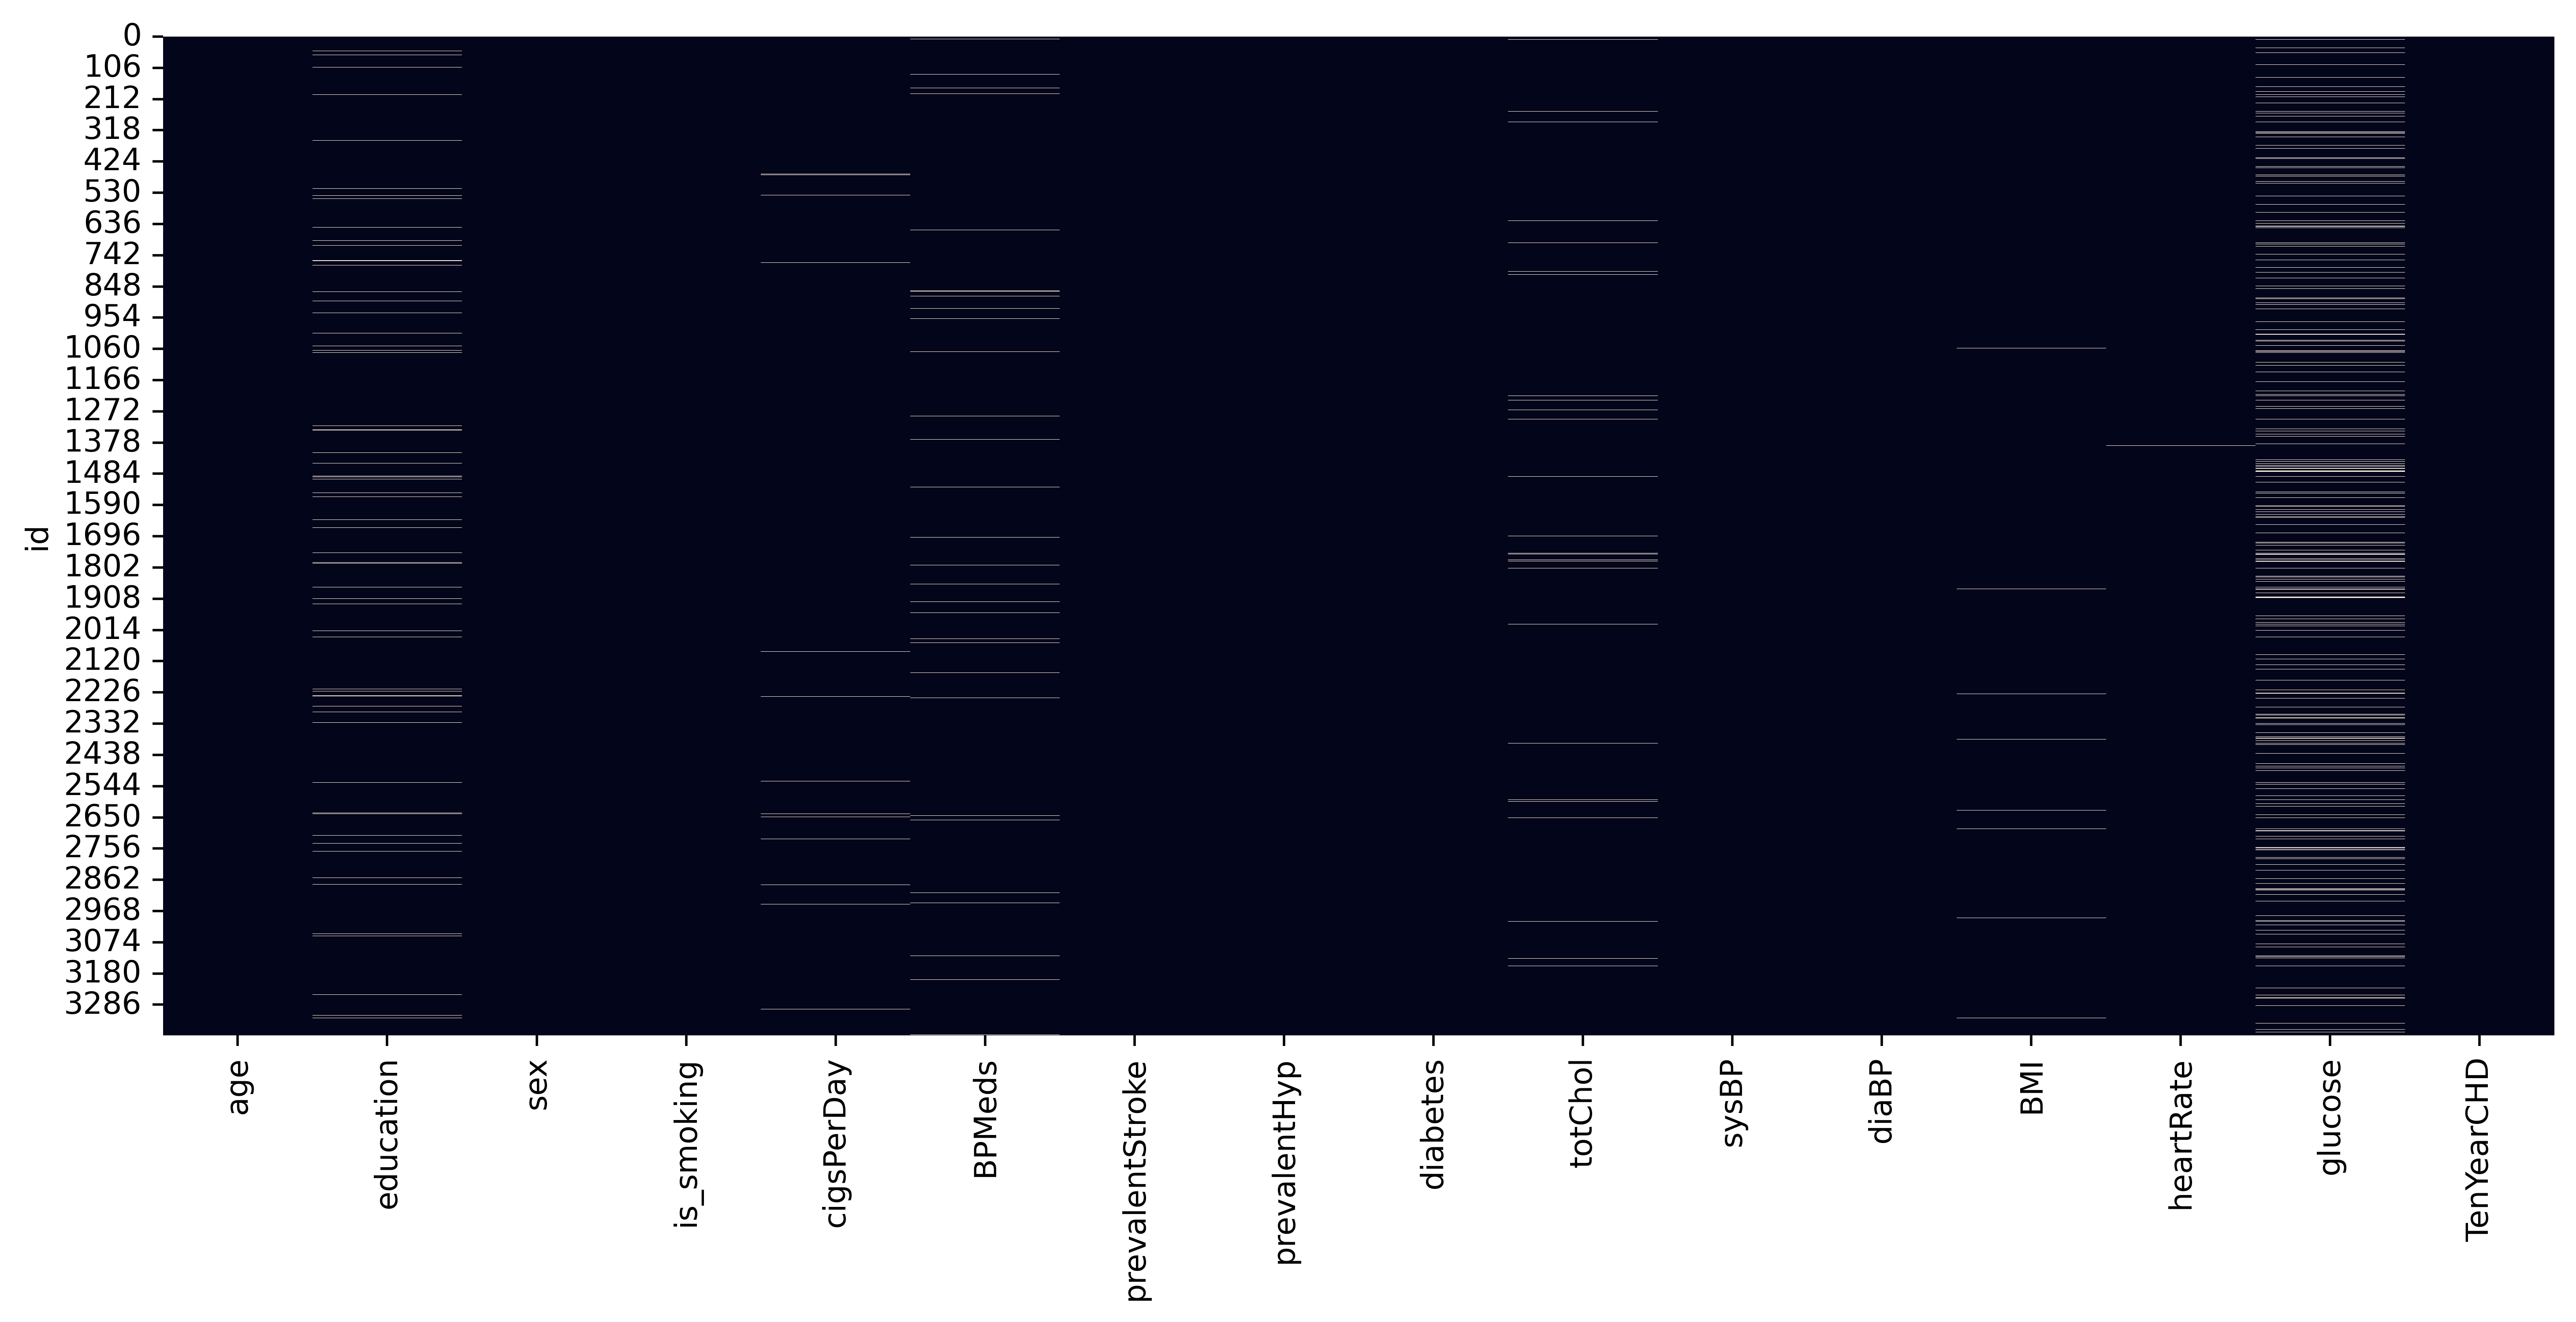

In [8]:
# visualize the missing values
plt.figure(figsize=(14,6),dpi=250)
sns.heatmap(cardio_risk.isnull(),cbar = False)
plt.show()

In [9]:
# understand the variables
variables = pd.DataFrame(columns=['variable','Data type','Number of unique values','Values'])
for i,var in enumerate(cardio_risk.columns):
    variables.loc[i] = [var,cardio_risk[var].dtypes,cardio_risk[var].nunique(),cardio_risk[var].unique().tolist()]
variables.set_index('variable')

,Data type,Number of unique values,Values
variable,,,
age,int64,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
education,float64,4,"[2.0, 4.0, 1.0, 3.0, nan]"
sex,object,2,"[F, M]"
is_smoking,object,2,"[YES, NO]"
cigsPerDay,float64,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
BPMeds,float64,2,"[0.0, nan, 1.0]"
prevalentStroke,int64,2,"[0, 1]"
prevalentHyp,int64,2,"[0, 1]"
diabetes,int64,2,"[0, 1]"


In [10]:
cardio_risk.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Variables Description

**Demographic:**

1) Age: Age of the patient.

2) Sex: male or female("M" or "F")

**Behavioral:**

3) is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

4) CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

**Medical(history):**

5) BPMeds: whether or not the patient was on blood pressure medication.

6) Prevalent Stroke: whether or not the patient had previously had a stroke.

7) Prevalent Hyp: whether or not the patient was hypertensive.

8) Diabetes: whether or not the patient had diabetes.

**Medical(current):**

9) Tot Chol: total cholesterol level.

10) Sys BP: systolic blood pressure.

11) Dia BP: diastolic blood pressure.

12) BMI: Body Mass Index.

13) Heart Rate: heart rate.

14) Glucose: glucose level.

**Target feature(class of risk):**

15) TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)
    

## 1. Data Preprocessing
1. handling missing values
2. handling categorical values

In [11]:
# Missing Values
print(round(cardio_risk.isna().sum()[cardio_risk.isna().sum()>0].sort_values(ascending = False)/len(cardio_risk)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [10]:
# Imputing missing values with median or mode
cardio_risk.fillna({'glucose': cardio_risk['glucose'].median(),
           'education': cardio_risk['education'].mode()[0],
           'BPMeds': cardio_risk['BPMeds'].mode()[0],
           'totChol': cardio_risk['totChol'].median(),
           'cigsPerDay': cardio_risk['cigsPerDay'].median(),
           'BMI': cardio_risk['BMI'].median(),
           'heartRate': cardio_risk['heartRate'].median()}, inplace=True)

In [11]:
print(cardio_risk.isna().sum())

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [12]:
# Encode your categorical columns

cardio_risk['sex'] = pd.get_dummies(cardio_risk['sex'], drop_first=True)
cardio_risk['is_smoking'] = pd.get_dummies(cardio_risk['is_smoking'], drop_first=True)

cardio_risk.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
cardio_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   uint8  
 3   is_smoking       3390 non-null   uint8  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), uint8(2)
memory usage: 403.9 KB


After conducting a more in-depth examination of heart-related factors, it became evident that pulse pressure, defined as the disparity between systolic and diastolic blood pressure, exerts a significant influence on coronary heart disease (CHD). Consequently, we have the opportunity to construct a novel variable named 'PP' (pulse pressure) that amalgamates the systolic and diastolic blood pressure measurements into a unified column.

In [13]:
 #Adding pulse pressure as a column
cardio_risk['pulsePressure'] = cardio_risk['sysBP'] - cardio_risk['diaBP']

# droping systolic and diastolic blood pressure column
cardio_risk.drop(['sysBP','diaBP'],axis=1,inplace=True)

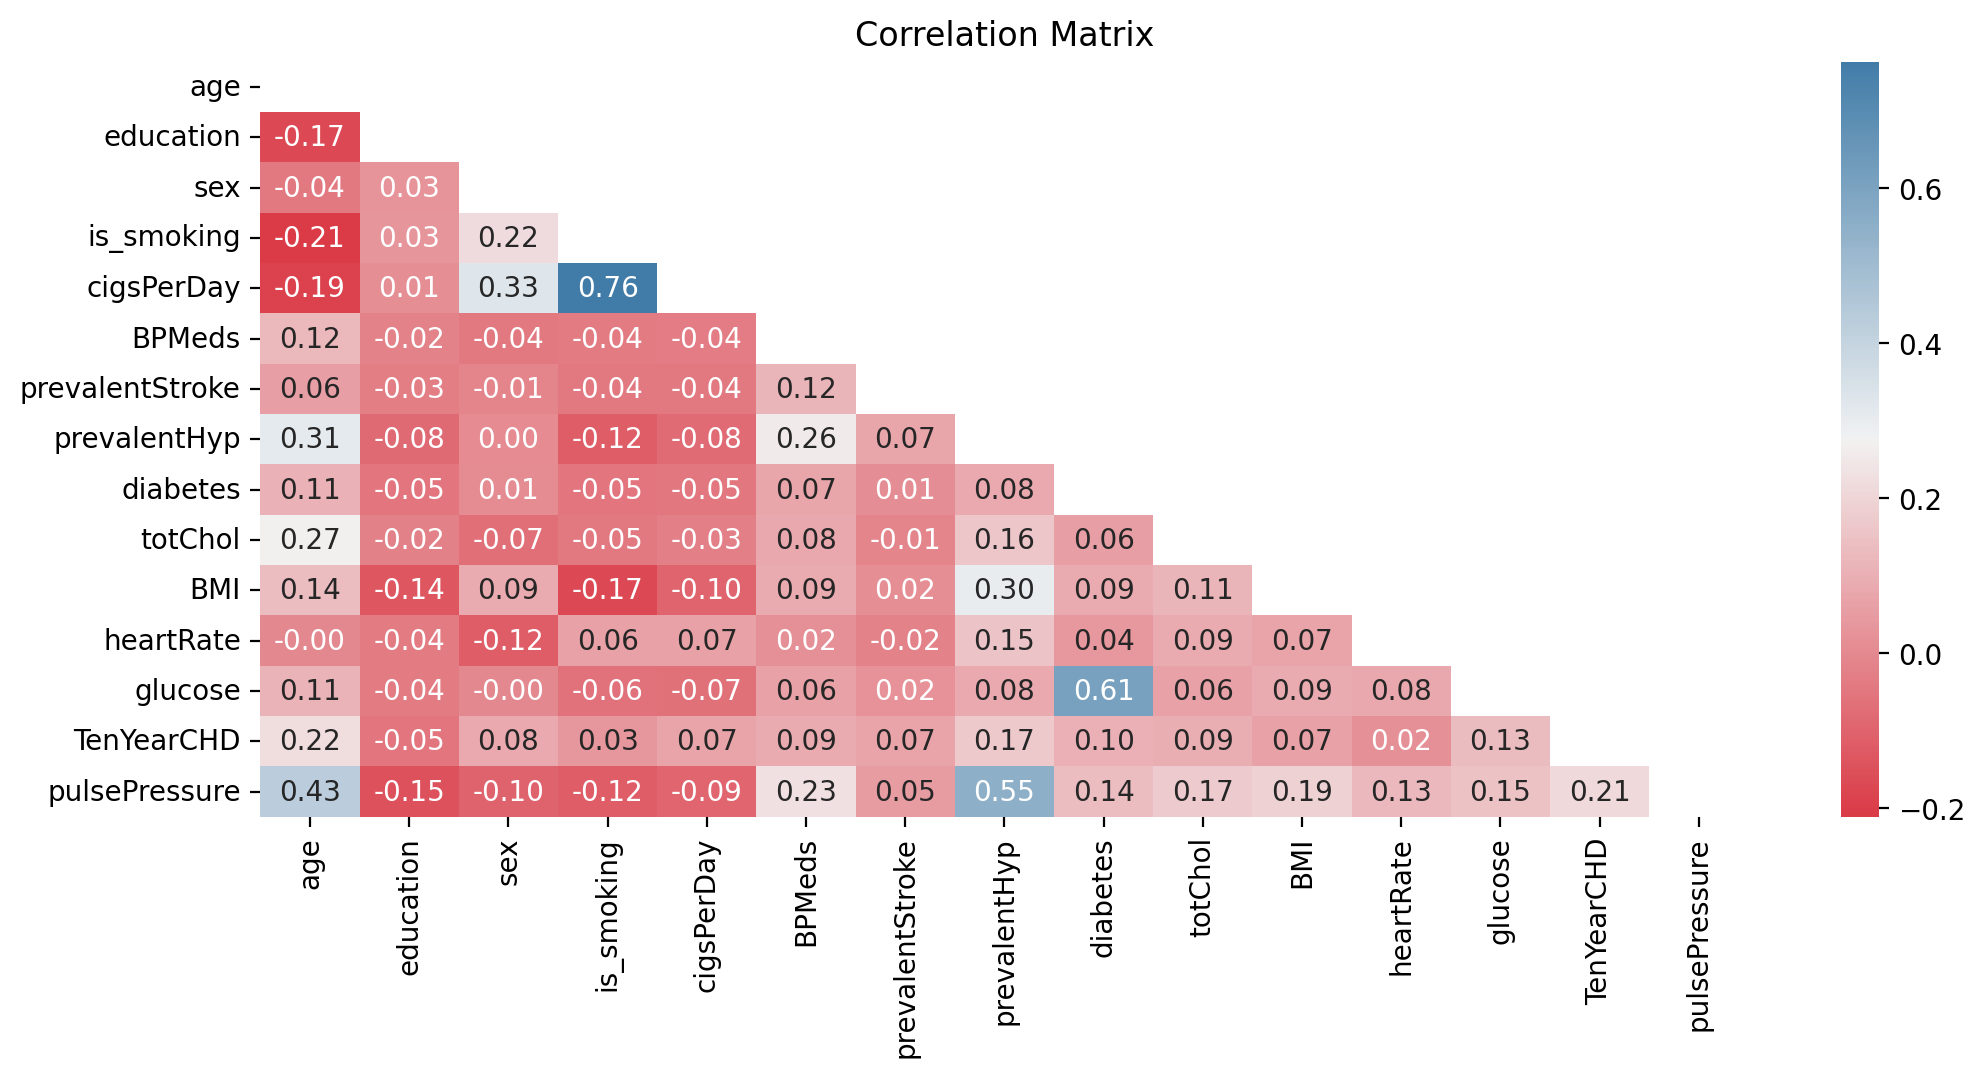

In [14]:
# Correlations
# Correlation heatmap
correlation_matrix = cardio_risk.corr()
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 5),dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap,mask=mask,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Observing a substantial correlation between the 'is_smoking' and 'cigsPerDay' columns, we've chosen to eliminate one of them, particularly the one with a lesser influence on the target variable.

In [15]:
# droping is_smoking and prevalentHyp columns
cardio_risk.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

In [16]:
# Scaling your data
x= cardio_risk.drop('TenYearCHD',axis=1)
y= cardio_risk[['TenYearCHD']]
print(x.shape)
print(y.shape)


# Creating object
std_regressor= StandardScaler()

# Fit and Transform
X= std_regressor.fit_transform(x)

(3390, 12)
(3390, 1)


## Handling Imbalance dataset

In [22]:
print(cardio_risk.TenYearCHD.value_counts()/cardio_risk.shape[0]*100)

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64


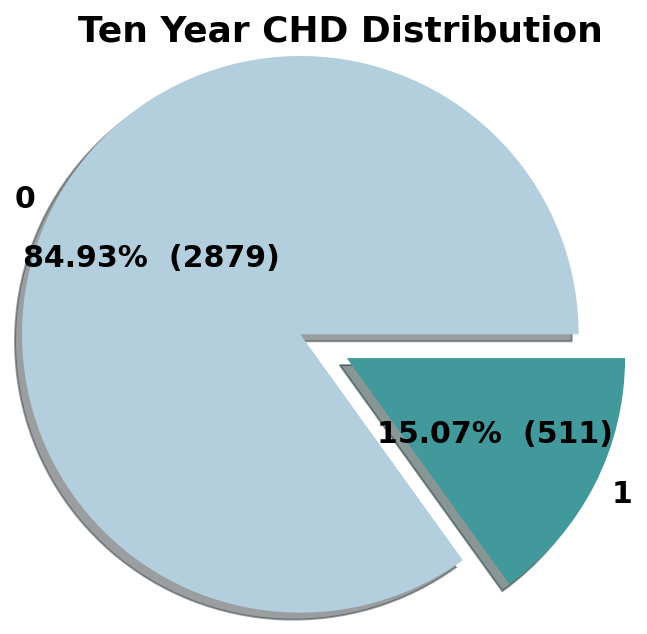

In [23]:
# propoertion of type of hotels(this include both cancelled and non-cancelled booking)
CHD_proportion  = cardio_risk.TenYearCHD.value_counts()
CHD_proportion

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(CHD_proportion.values,labels = CHD_proportion.index,autopct=make_autopct(CHD_proportion.values),radius=1.6,textprops={"fontsize":15,'weight':'semibold'},labeldistance=1.07,shadow=True,explode=[0.3,0.0], colors=['#b3cedc','#41999c'])
plt.title("Ten Year CHD Distribution ",fontsize=18,pad=50,weight='semibold')
plt.show()

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [18]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
x_resampled, y_resampled = smote.fit_resample(X, y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', cardio_risk.shape)
print('Resampled dataset shape:', x_resampled.shape)

# Count the number of samples in each class in the resampled dataset
print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (3390, 13)
Resampled dataset shape: (5758, 12)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
dtype: int64


In [19]:
X_train,X_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=42)

In [20]:
print(f'The shape of x_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 12)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 12)
The shape of y_test is: (1152, 1)


I employed the Synthetic Minority Over-sampling Technique (SMOTE) to address the issue of imbalanced dataset. SMOTE is an oversampling method that creates synthetic data points for the minority class by interpolating new instances between the existing ones. This approach serves to balance the distribution of classes, mitigating the bias typically observed towards the majority class in imbalanced datasets. As a result, it can enhance the effectiveness of machine learning models when dealing with imbalanced datasets.

## ML Model Implementations

In [23]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    metric = pd.DataFrame({"Accuracy":[train_accuracy,test_accuracy],
                      "Precision":[train_precision,test_precision],
                      "Recall":[train_recall,test_recall],"Roc-auc":[train_roc_auc,test_roc_auc]},index=["Train","Test"])
    return metric.round(4)

### ML Model 1 :- Logistic Regression 

In [24]:
# Model Implementation
log_reg = LogisticRegression()

# fit the algo
log_reg.fit(X_train,y_train)

# predict on the model
y_pred_train_log_reg = log_reg.predict(X_train)
y_pred_test_log_reg = log_reg.predict(X_test)


In [25]:
# model performance
model_metrics(y_train,y_test,y_pred_train_log_reg,y_pred_test_log_reg)

,Accuracy,Precision,Recall,Roc-auc
Train,0.6739,0.6751,0.6775,0.6739
Test,0.6623,0.6554,0.6519,0.6621


In [26]:
# Cross validation and Hyperparameter Tuning
param_grid = {'penalty':['l1','l2'],
             'C':[0.1,1.0,10.0],
             'solver' :['liblinear','saga']}

# fit the algo
GridSearch_lgr = GridSearchCV(log_reg,param_grid,cv=5)
GridSearch_lgr.fit(X_train,y_train)

# get the best paramter
best_params = GridSearch_lgr.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
from sklearn.model_selection import cross_val_score
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, X_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(X_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(X_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(X_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(X_test)[:, 1]

In [65]:
# model performance
lgr_performance = model_metrics(y_train,y_test,y_train_logistic_pred_cv,y_test_logistic_pred_cv)
lgr_performance

,Accuracy,Precision,Recall,Roc-auc
Train,0.6730,0.6738,0.6779,0.6730
Test,0.6632,0.6565,0.6519,0.6629


Despite these efforts, we did not observe any significant enhancements in our results.

### ML Model 2  :-  KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [32]:
# Model Performace
model_metrics(y_train,y_test,y_pred_train_knn,y_pred_test_knn)

,Accuracy,Precision,Recall,Roc-auc
Train,0.8715,0.8014,0.9896,0.8708
Test,0.7986,0.7221,0.9556,0.8021


In [33]:
# Cross Validation and Hyperparametr tuning
param_grid = {'n_neighbors':[i for i in range(3,15)],
             'weights':['uniform','distance']}

# fit the algo
GridSearch_knn = GridSearchCV(knn,param_grid,cv=5)
GridSearch_knn.fit(X_train,y_train)

# get the best hyperparameter 
best_params = GridSearch_knn.best_params_
print("Best hyperparametrs",best_params)

Best hyperparametrs {'n_neighbors': 4, 'weights': 'distance'}


In [37]:
# fit the new algo
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train,y_train)

# predict on the model
y_pred_knn_best_train = knn_best.predict(X_train)
y_pred_knn_best_test = knn_best.predict(X_test)
y_score_knn_pred_gs = knn_best.predict_proba(X_test)[:, 1]

In [74]:
knn_performance = model_metrics(y_train,y_test, y_pred_knn_best_train,y_pred_knn_best_test)
knn_performance

,Accuracy,Precision,Recall,Roc-auc
Train,1.0000,1.0000,1.0000,1.0000
Test,0.8377,0.7582,0.9805,0.8408


By leveraging GridSearchCV, we were able to optimize the performance of our machine learning model by exhaustively searching for the best hyperparameters through all possible combinations. As a result of selecting optimal values, our model's performance improved significantly.

In the KNN model, we observed an improvement in accuracy from 79.86% to 83.77%, and a Precision of 75.82%, Recall of 98.05%, and ROC AUC score of 0.8408, which is higher after hyperparameter tuning.


### ML Model 3:- Support Vector  Classifier (SVC)

In [39]:
# ML Model - 5 Implementation
svc = SVC(kernel='rbf', C=1, gamma='scale')

# Fit the Algorithm
svc.fit(X_train, y_train)

# Predict on the model
y_train_svc_pred = svc.predict(X_train)
y_test_svc_pred = svc.predict(X_test)

In [40]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_svc_pred, y_test_svc_pred)

,Accuracy,Precision,Recall,Roc-auc
Train,0.7397,0.7382,0.7474,0.7396
Test,0.7040,0.6881,0.7211,0.7044


In [42]:
# cross validation and hyperparameter tuning

svc = SVC(probability=True)

# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(X_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(X_test)
y_train_svc_pred_gs = svc_best.predict(X_train)
y_score_svc_pred_gs = svc_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [75]:
# Visualizing evaluation Metric Score chart
svc_performance = model_metrics(y_train, y_test, y_train_svc_pred_gs, y_test_svc_pred_gs)
svc_performance

,Accuracy,Precision,Recall,Roc-auc
Train,0.8343,0.8112,0.8739,0.8341
Test,0.7665,0.7269,0.8366,0.7680


After performing hyperparameter tuning, we observed a slight improvement in our model's performance. The accuracy increased from 70.40% to 76.65%, precision improved from 68.81% to 72.69%, and recall increased from 72.11% to 83.66%. We also achieved an AUC ROC of 0.7644.

### ML Model 4 :- Random Forest

In [44]:
# ML Model Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(X_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(X_train)
y_test_rf_pred = random_forest.predict(X_test)

In [45]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

,Accuracy,Precision,Recall,Roc-auc
Train,0.9375,0.9152,0.965,0.9373
Test,0.8325,0.8063,0.865,0.8332


In [82]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(X_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(X_train)
y_test_rf_pred_gs  = random_forest_best.predict(X_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [50]:
y_score_rf_pred_gs = random_forest_best.predict_proba(X_test)[:, 1]

In [77]:
# Visualizing evaluation Metric Score chart
rf_performance = model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)
rf_performance

,Accuracy,Precision,Recall,Roc-auc
Train,1.0000,1.0000,1.0000,1.0000
Test,0.8915,0.8737,0.9094,0.8919


* Following hyperparameter tuning, we determined the best parameters to be **'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 300.**

* While hyperparameter tuning yielded a 100% train accuracy, it did not necessarily translate to the same level of performance on the test data. However, we were able to enhance the test accuracy significantly, raising it from **83.59% to 89.24%**.

* Furthermore, our efforts also resulted in an **improved ROC AUC score, increasing from 0.8367 to 0.8927**

### ML Model 5 - XGBoost Classifier

In [52]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(X_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)

In [53]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

,Accuracy,Precision,Recall,Roc-auc
Train,0.9959,1.0000,0.9918,0.9959
Test,0.8950,0.9139,0.8668,0.8943


In [54]:
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}

# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(X_train)
y_test_xgb_pred_gs  = best_estimator.predict(X_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(X_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [78]:
# Visualizing evaluation Metric Score chart
xgb_performance = model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)
xgb_performance

,Accuracy,Precision,Recall,Roc-auc
Train,0.9957,1.0000,0.9914,0.9957
Test,0.8950,0.9093,0.8721,0.8945


We got best parameters as 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300 after hyperparameter tuning.

All the performance metric has not significantly change.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the context of Predicting TenYearCHD, this is treated as a classification problem. In this scenario, the primary objective is to predict an outcome variable (TenYearCHD) based on one or more predictor variables.

Evaluation metrics commonly employed for assessing the performance of a classification model include: **Accuracy, Precision, Recall and Roc-auc**. 

But for this CHD(chronic heart disease) prediction, we have to more focus on **high recall** model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

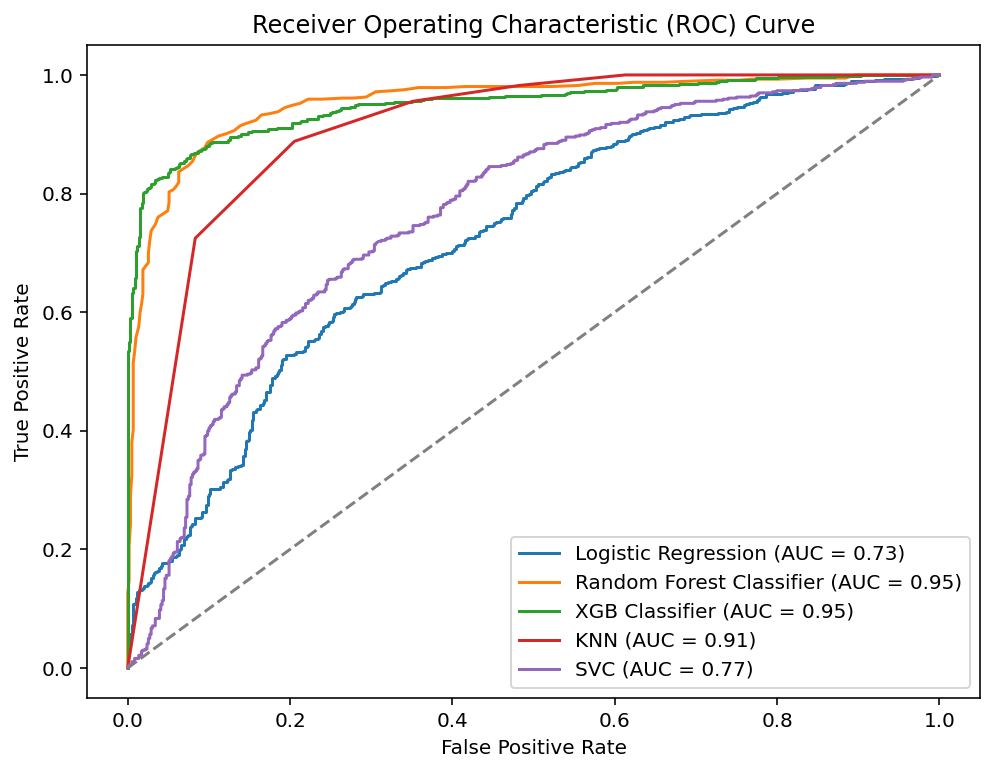

In [56]:
# define the classifiers
classifiers = [ ("Logistic Regression", LogisticRegression()),
                ("Random Forest Classifier", RandomForestClassifier()),
                ("XGB Classifier", XGBClassifier()),
                ("KNN", KNeighborsClassifier()),
                ("SVC", SVC(probability=True)) ]

# iterate through classifiers and plot ROC curves
plt.figure(figsize=(8, 6))
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**After cross validation and hyperparameter tuning**

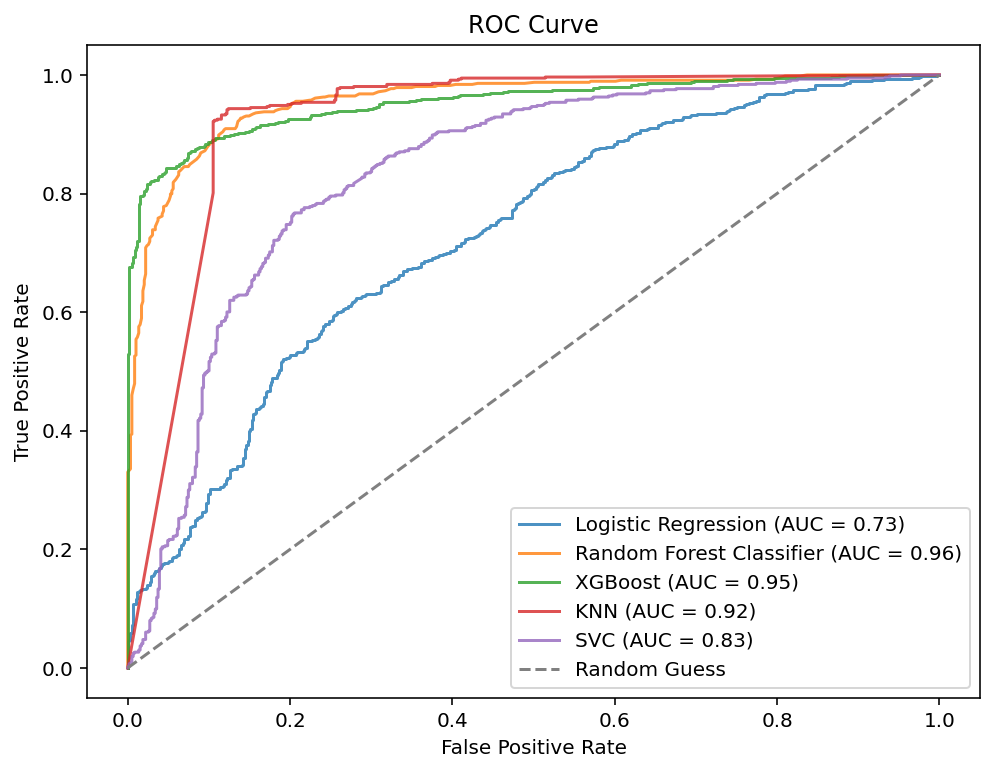

In [57]:
# Storing metrics in order to make dataframe
# (after cross validation and hyperparameter tuning)
Model = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC"]
Y_SCORE = [y_score_logistic_pred_cv, y_score_rf_pred_gs, y_score_xgb_pred_gs,
           y_score_knn_pred_gs, y_score_svc_pred_gs]

# Create dataframe from the lists
data = {'MODEL': Model, 'Y_SCORE': Y_SCORE}
Metric_df = pd.DataFrame(data)

# plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for i, row in Metric_df.iterrows():
    fpr, tpr, _ = roc_curve(y_test, row['Y_SCORE'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{row['MODEL']} (AUC = {roc_auc:.2f})", alpha=0.8)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
# Storing metrics in order to make dataframe of metrics
# (after cross validation and hyperparameter tuning)
Model          = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC"]
Test_Accuracy  = [0.6632,0.8915,0.8950,0.8377,0.7665]
Test_Precision = [0.6565,0.8737,0.9093,0.7582,0.7269]
Test_Recall    = [0.6529,0.9094,0.8721,0.9805,0.8366]
Test_ROC_AUC   = [0.73,0.96,0.95,0.92,0.83]
# Create dataframe from the lists
data = {'Model' : Model,
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall,
        'Test_ROC_AUC'   : Test_ROC_AUC}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_ROC_AUC
0,Logistic Regression,0.6632,0.6565,0.6529,0.73
1,Random Forest Classifier,0.8915,0.8737,0.9094,0.96
2,XGBoost,0.8950,0.9093,0.8721,0.95
3,KNN,0.8377,0.7582,0.9805,0.92
4,SVC,0.7665,0.7269,0.8366,0.83


* Considering the outcomes from various models evaluated within the cardiovascular risk prediction project, it becomes evident that the Random Forest Classifier and XGBoost models emerge as the most favorable choices for constructing the final prediction model. Both models exhibit impressive accuracy scores of 0.8915 and 0.8950, respectively, which are crucial attributes for real-time prediction systems. Furthermore, these models showcase commendable precision and recall scores, signifying their ability to accurately predict both positive and negative cases.

* Although the KNN model demonstrates a relatively high recall score, its accuracy and precision metrics fall short of those achieved by the Random Forest Classifier and XGBoost models. Similarly, the SVC model displays lower accuracy and ROC AUC scores, implying its potential unsuitability for this specific classification task.

* However, it's noteworthy that the XGBoost model outperforms the Random Forest Classifier marginally, boasting superior test accuracy and precision scores. This suggests that the XGBoost model may be the superior choice for forecasting cardiovascular risk.

* Furthermore, the XGBoost model exhibits a higher ROC AUC score, indicating its enhanced ability to discriminate between positive and negative cases. Therefore, based on these findings, the XGBoost model stands out as the most fitting classification model for predicting cardiovascular risk in this project.

**Conclusion From Model Implementation**

1. Out of the 5 models that underwent testing, the Random Forest Classifier and XGBoost models demonstrated superior performance, boasting notably high accuracy, precision, and recall scores."

2. While the KNN model exhibited a relatively commendable recall score, its accuracy and precision scores fell below those achieved by the Random Forest Classifier and XGBoost models."

3. The SVC model, with its lower accuracy and ROC AUC score, appears less well-suited for this specific classification task."

4. Comparatively, the XGBoost model outperformed the Random Forest Classifier, yielding slightly higher test accuracy and precision scores along with a superior ROC AUC score, implying its potential as a more effective choice for cardiovascular risk prediction."

5. Based on the outcomes presented, the **XGBoost model** was selected as the optimal classification model for the cardiovascular risk prediction dataset, delivering an **impressive accuracy rate of 89.57% and recall is 87.21%**"